In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [126]:
data=pd.read_csv('day.csv')

In [127]:
data.shape

(730, 16)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [129]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [130]:
#Checking for duplicates
#The data  dosent contain duplicates
data[data.duplicated()].shape

(0, 16)

In [131]:
#Checking for nulls
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [132]:
#Creating date column from dteday
data['day']=data['dteday'].apply(lambda x: int(x.split('-')[0]))

# dropping the unnecessary columns
# instant is index for the row. casual and registered sbreakup of date column.

data.drop(columns = ['instant','dteday','casual','registered'], inplace=True)

In [133]:
# Encoding/mapping the season column

data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

data.mnth = data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [134]:
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
day            31
dtype: int64

In [135]:
cat_cols=["season","yr","holiday","weekday","workingday","weathersit"]
cont_cols=["temp","atemp","hum","windspeed","day"]
target=["cnt"]

# Univariate Analysis

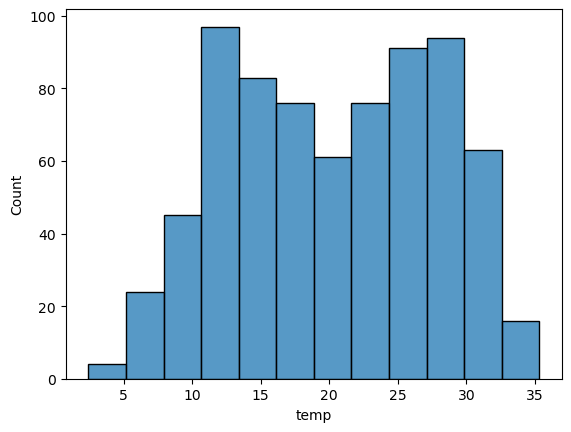

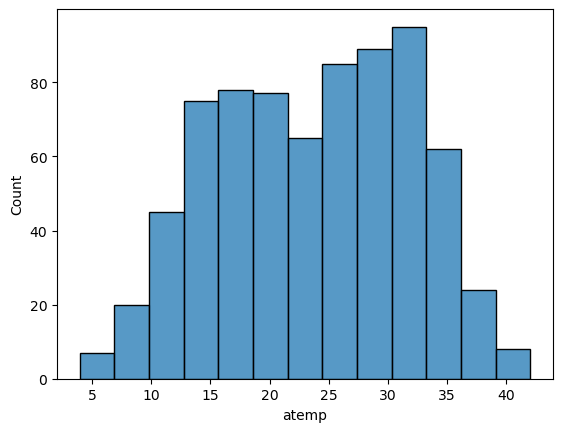

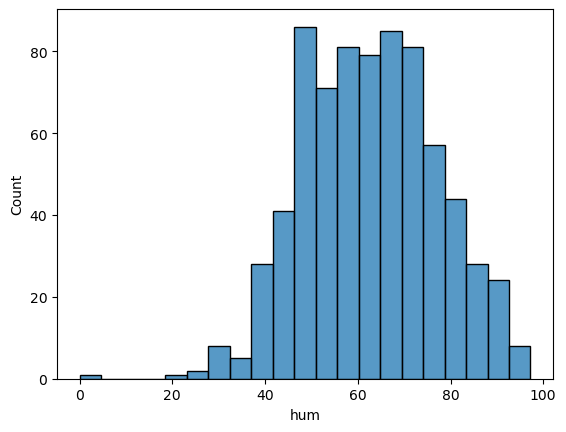

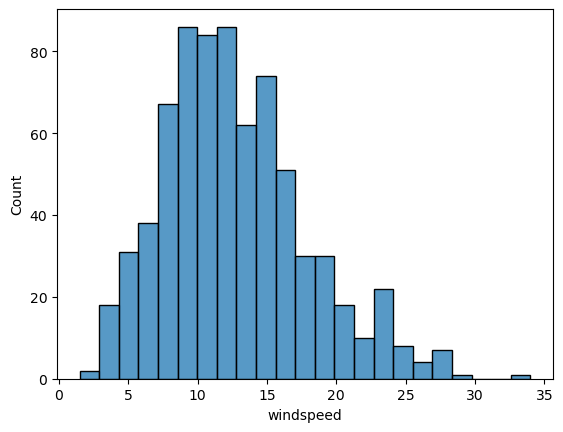

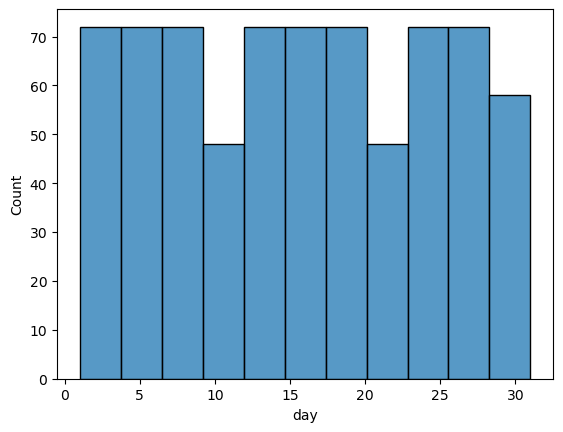

In [136]:
for i in cont_cols:
    sns.histplot(x=data[i])
    plt.show()

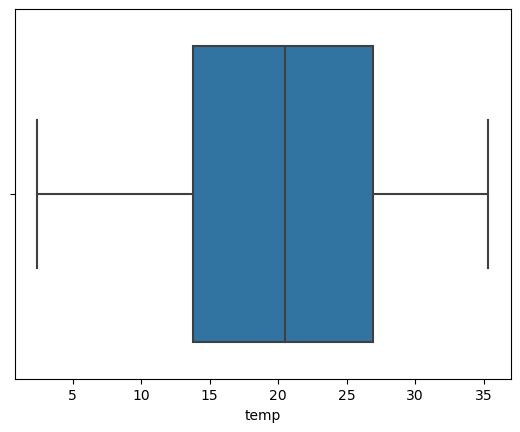

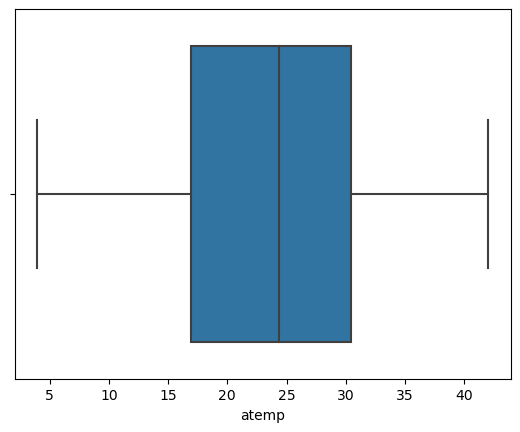

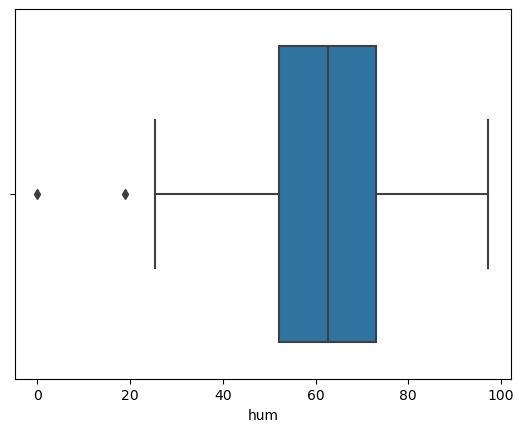

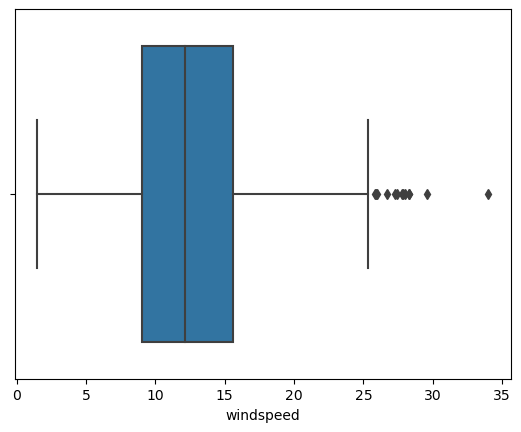

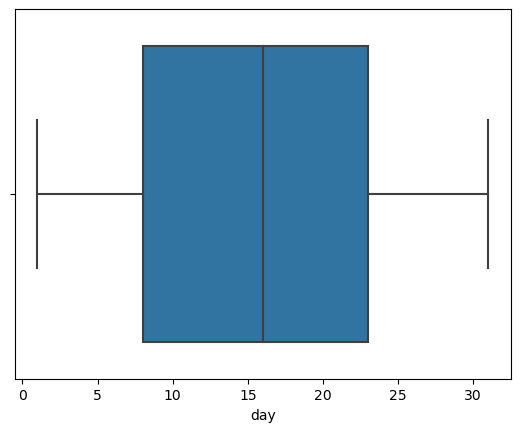

In [137]:
for i in cont_cols:
    sns.boxplot(x=data[i])
    plt.show()

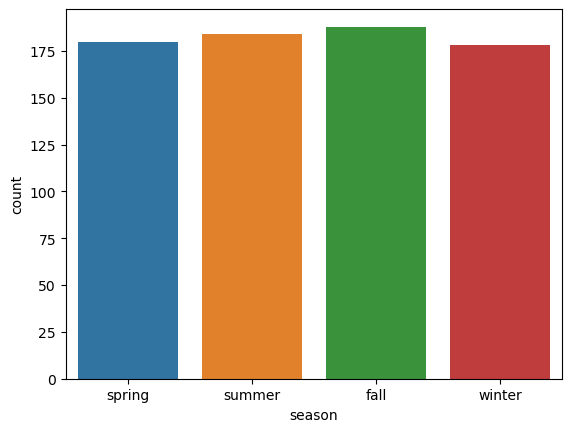

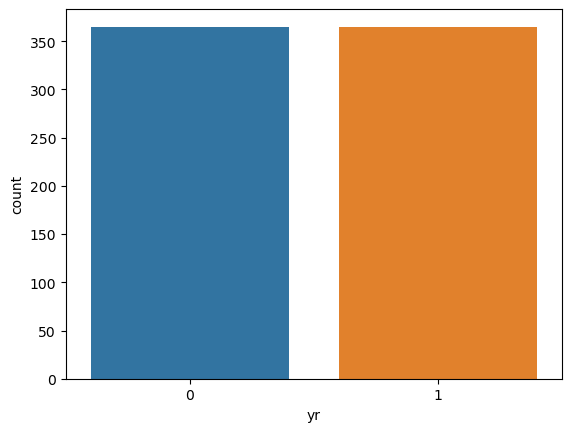

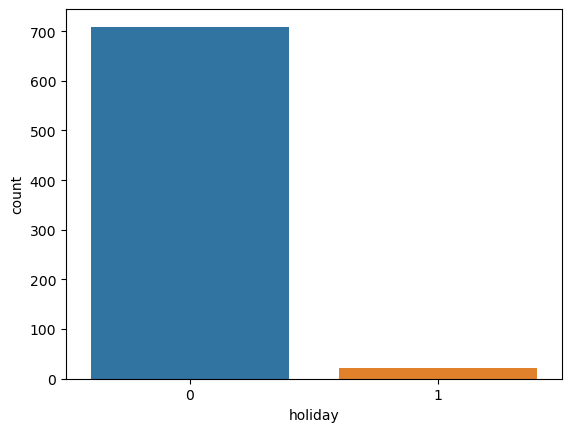

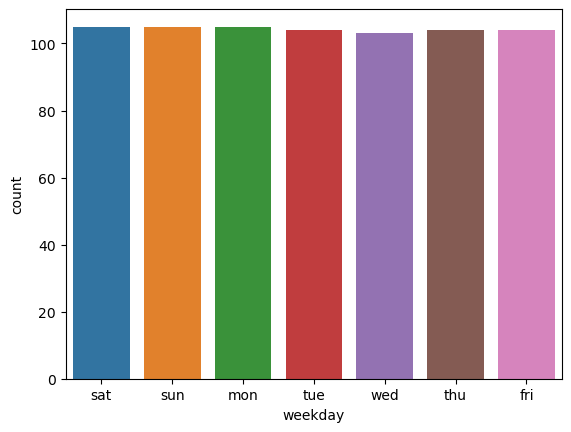

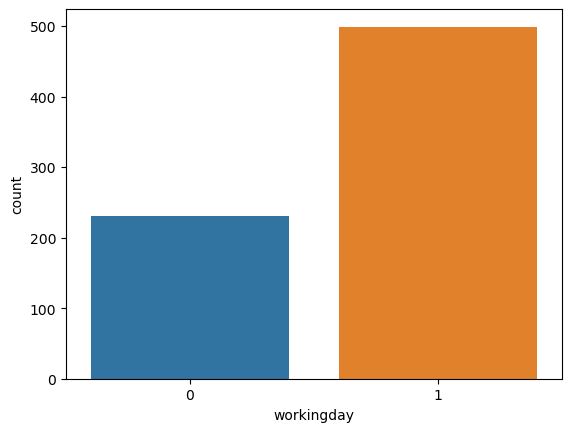

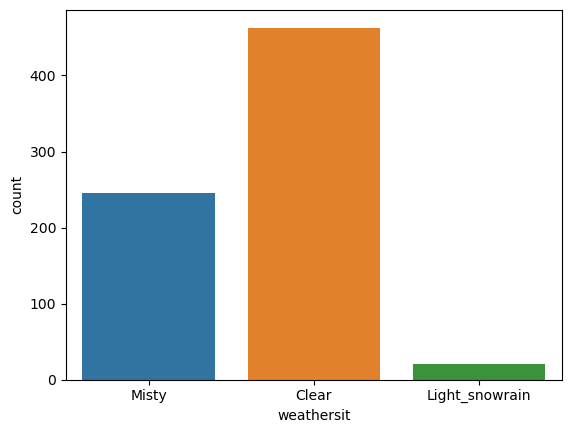

In [138]:
for i in cat_cols:
    sns.countplot(x=data[i])
    plt.show()

# Bivariate Analysis

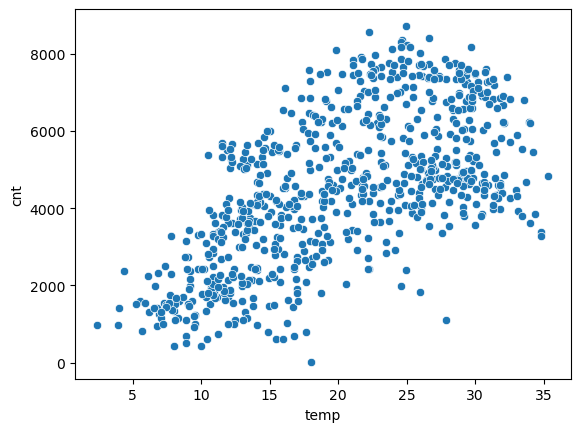

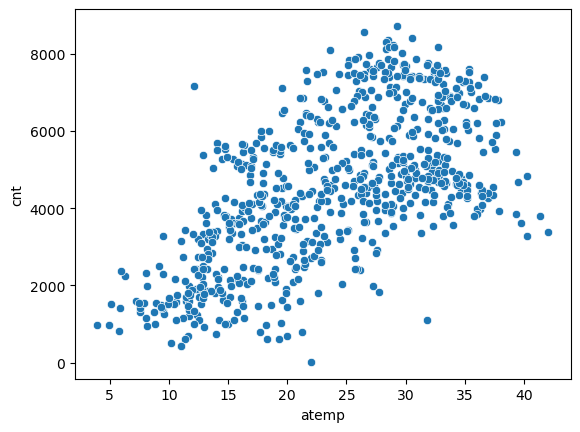

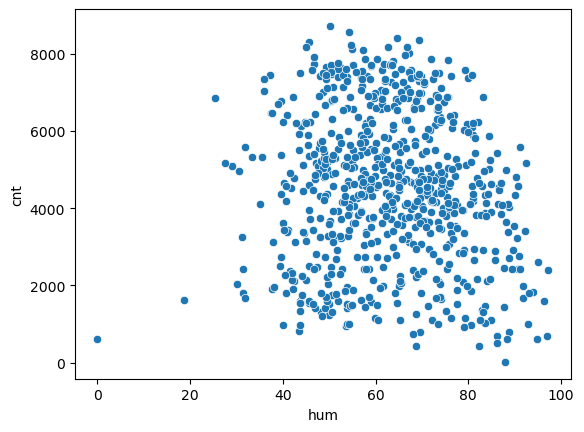

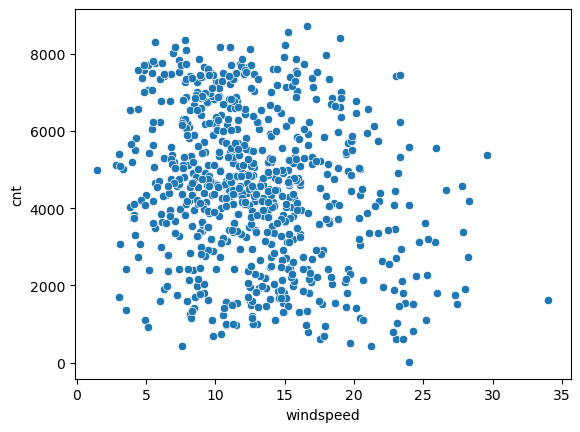

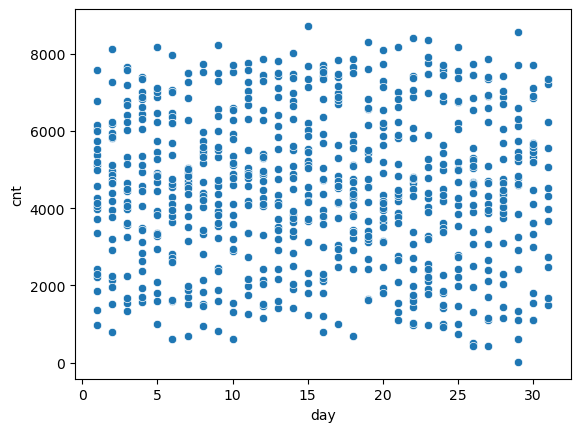

In [139]:
for i in cont_cols:
    sns.scatterplot(x=data[i],y=data["cnt"])
    plt.show()

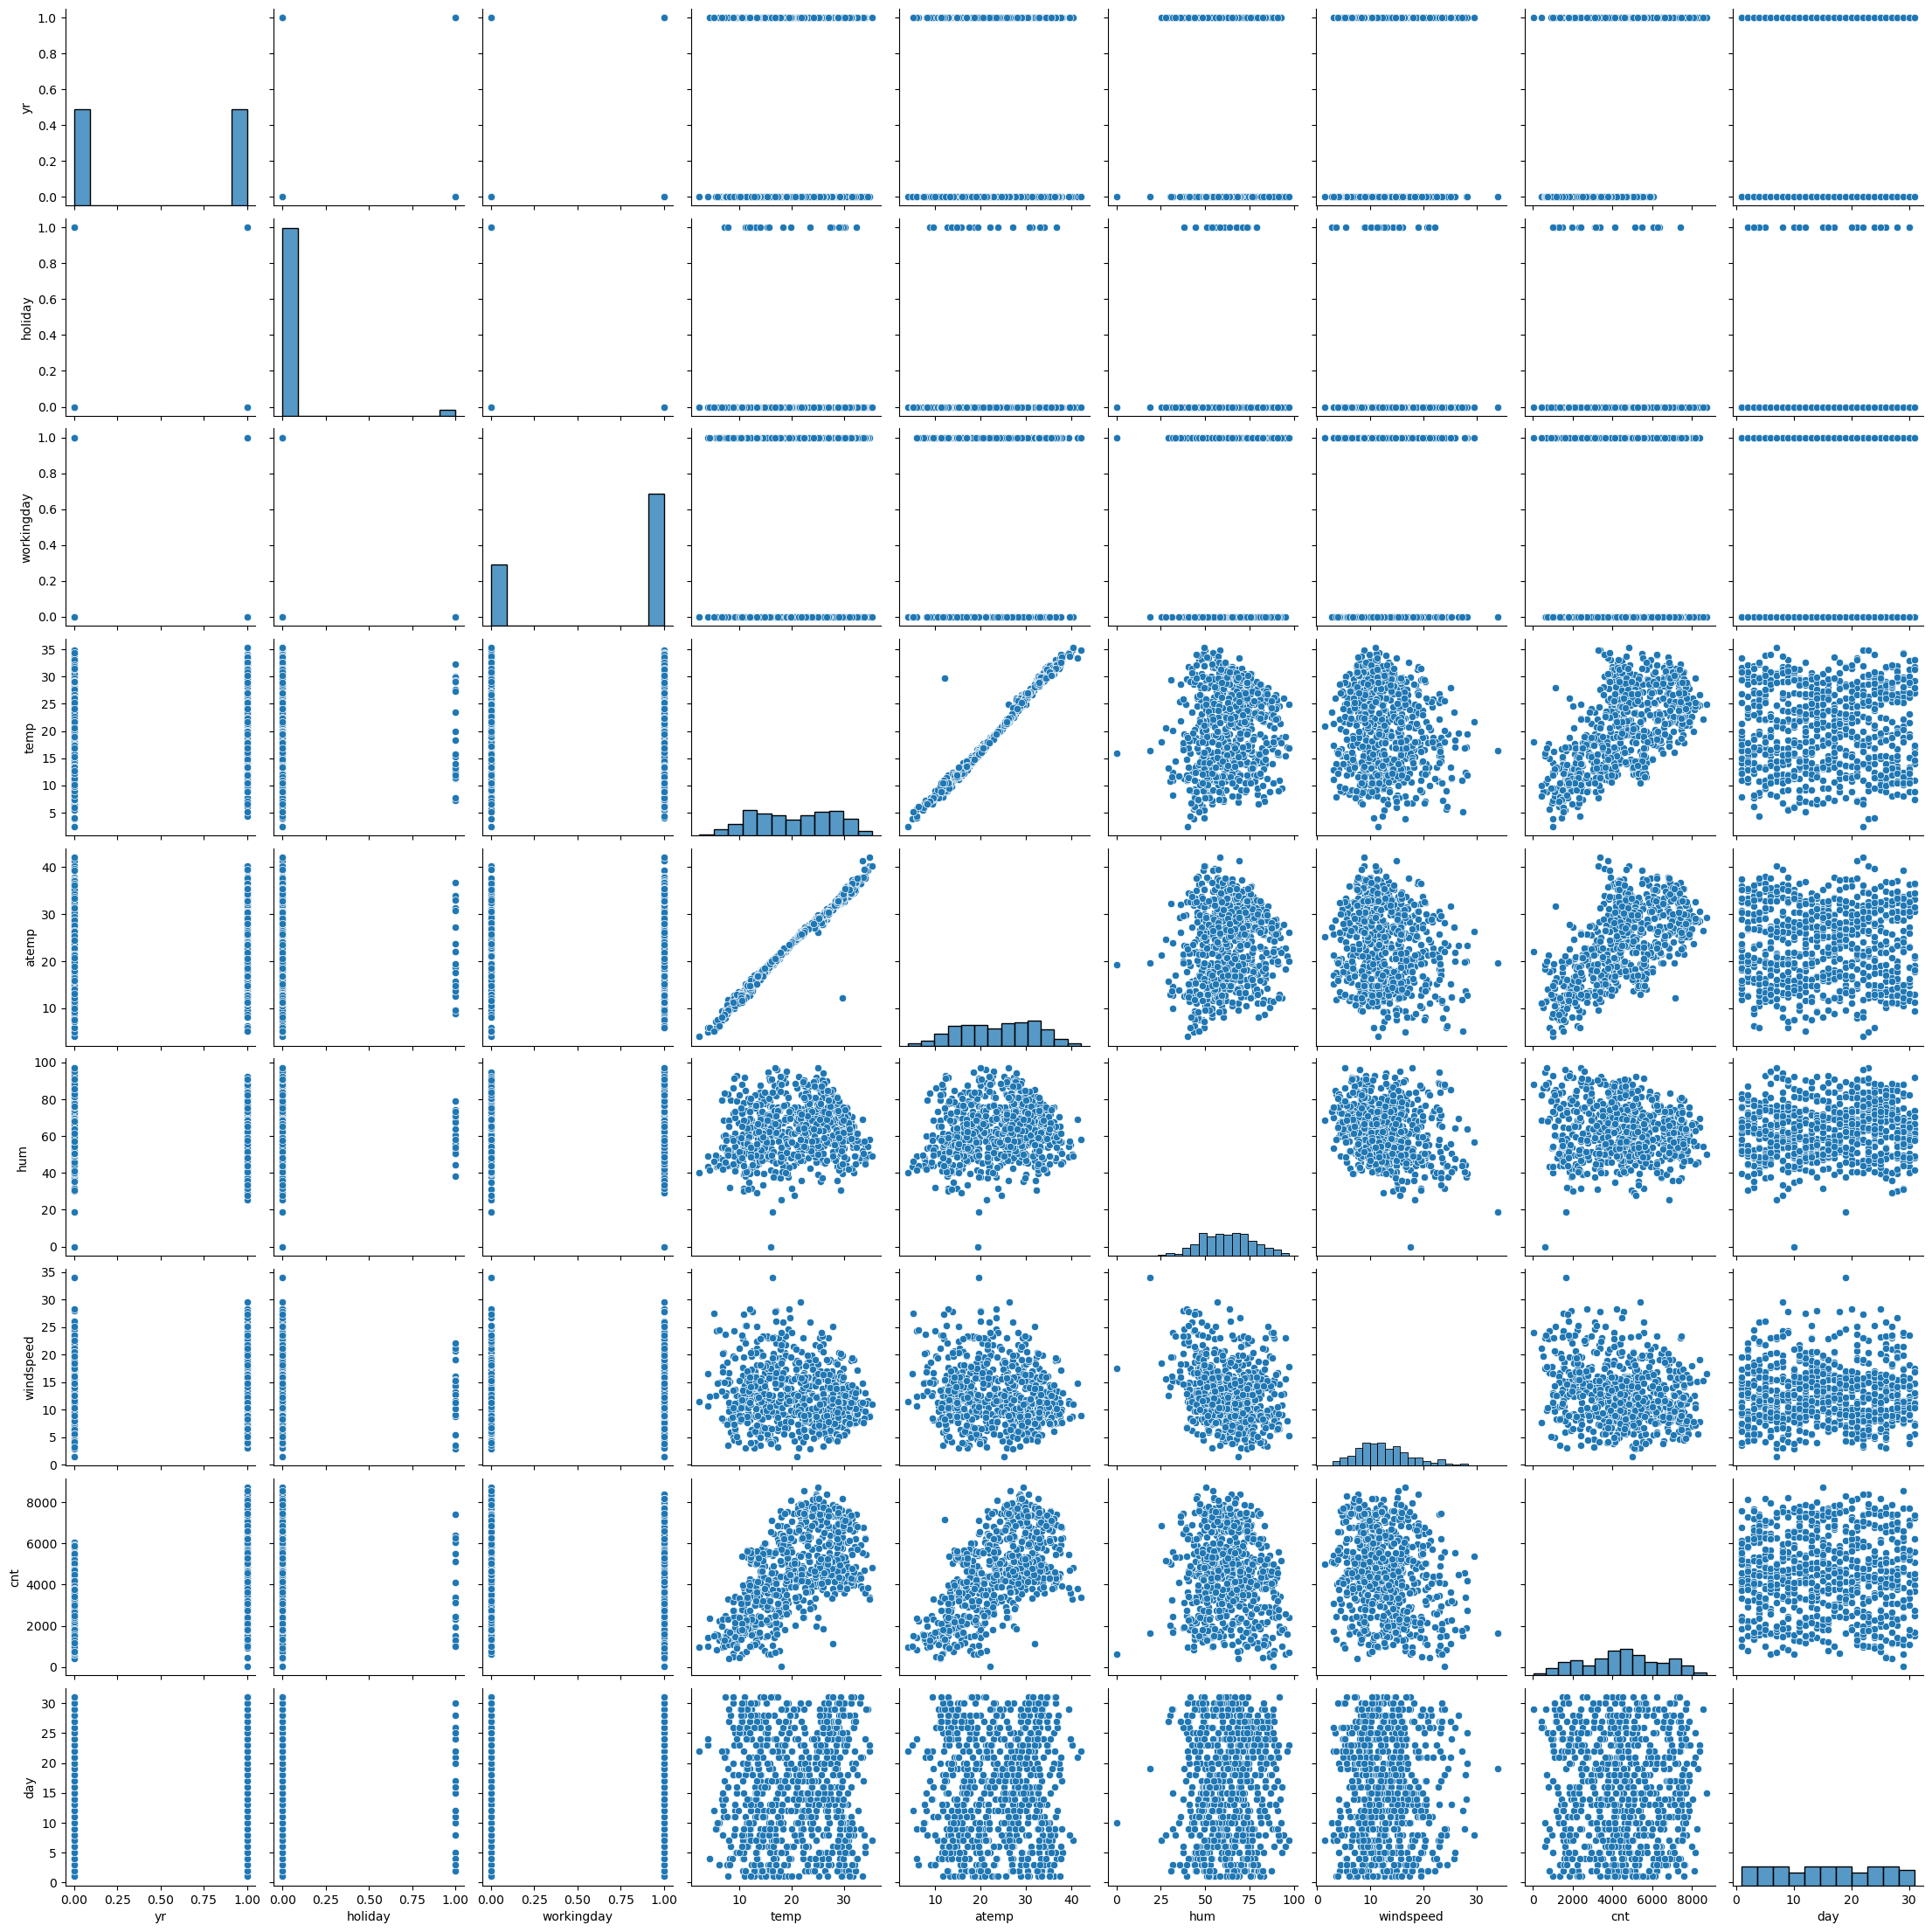

In [140]:
sns.pairplot(data)
plt.show()

In [141]:
# Creating Dummy variable - mnth, weekday, weathersit and season variables. and containating

months_data=pd.get_dummies(data.mnth,drop_first=True)
weekdays_data=pd.get_dummies(data.weekday,drop_first=True)
weathersit_data=pd.get_dummies(data.weathersit,drop_first=True)
seasons_data=pd.get_dummies(data.season,drop_first=True)

df = pd.concat([data,months_data,weekdays_data,weathersit_data,seasons_data],axis=1)
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [142]:
months_data

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [143]:
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [144]:
# Using MinMaxScaler - Rescaling

scaler = MinMaxScaler()

In [145]:
df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])

<Axes: >

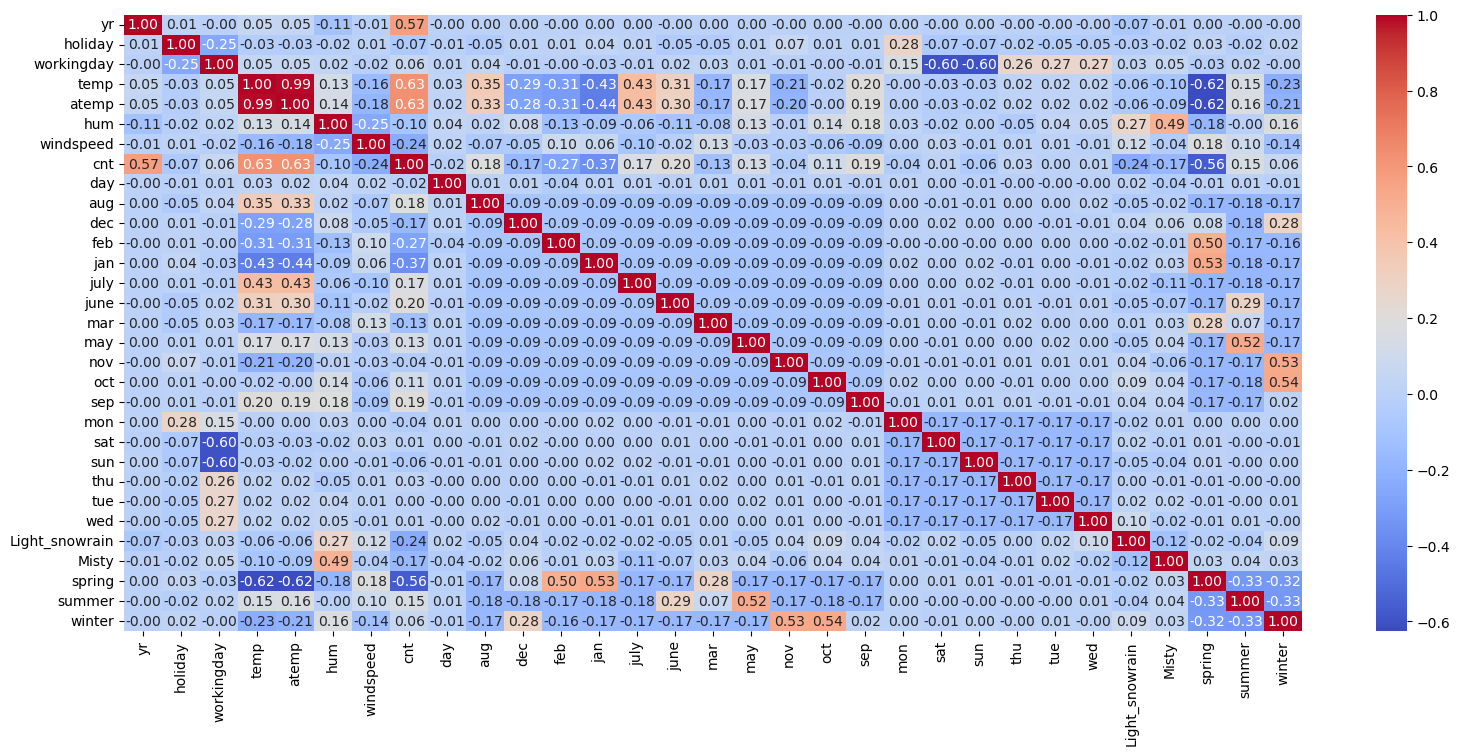

In [146]:
#Checking corelation
plt.figure(figsize=(19, 8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt=".2f")

In [147]:
y_train = df_train.pop('cnt')
X_train = df_train

In [148]:
# applying RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [149]:
rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

In [150]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]

In [151]:
#Rejected columns
X_train.columns[~rfe.support_]


Index(['day', 'aug', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [152]:
def VIFFunction(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [153]:
X_train_rfe = X_train[col]

In [154]:
# calculate VIF

VIFFunction(X_train_rfe)

,Features,VIF
3,temp,57.69
4,atemp,57.13
2,workingday,43.32
10,sun,10.78
9,sat,10.41
13,spring,2.79
1,holiday,2.78
5,hum,1.92
14,winter,1.80
12,Misty,1.60


# Model Building

In [155]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          5.49e-218
Time:                        23:38:32   Log-Likelihood:                -4714.4
No. Observations:                 584   AIC:                             9459.
Df Residuals:                     569   BIC:                             9524.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2194.2986    212.332     10.334      0.000    1777.248    2611.349
yr              1995.4389     66.059     30.207      0.000    1865.691    2125.187
holiday          -84.7725    169.066     -0.501      0.616    -416.842     247.297
workingday       887.7226     76.404     11.619      0.000     737.655    1037.791
temp            2703.2259   1096.901      2.464      0.014     548.757    4857.695
atemp           1094.9870   1162.032      0.942      0.346   -1187.409    3377.383
hum            -1154.8340    312.695     -3.693      0.000   -1769.011    -540.657
windspeed      -1412.2799    213.878     -6.603      0.000   -1832.367    -992.193
jan             -341.2831    140.741     -2.425      0.016    -617.718     -64.848
sep              580.9812    123.675      4.698      0.000     338.066     823.896
sat              954.8695     94.289     10.127      0.000     769.672    1140.067
sun              436.4790     94.935      4.598      0.000     250.013     622.945
Light_snowrain -2286.4413    223.045    -10.251      0.000   -2724.532   -1848.350
Misty           -481.0175     86.592     -5.555      0.000    -651.097    -310.938
spring          -952.1840    125.220     -7.604      0.000   -1198.134    -706.234
winter           483.6679    100.795      4.799      0.000     285.692     681.643
==============================================================================
Omnibus:                       88.729   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.745
Skew:                          -0.779   Prob(JB):                     9.55e-50
Kurtosis:                       5.617   Cond. No.                     1.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.68e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [156]:
#High VIF - temp

# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
VIFFunction(X_train_new)

,Features,VIF
2,workingday,43.26
9,sun,10.77
8,sat,10.39
3,atemp,2.78
1,holiday,2.77
12,spring,2.74
4,hum,1.92
13,winter,1.73
11,Misty,1.60
6,jan,1.49


In [157]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     232.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          7.15e-218
Time:                        23:39:44   Log-Likelihood:                -4717.5
No. Observations:                 584   AIC:                             9463.
Df Residuals:                     570   BIC:                             9524.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2218.1189    213.054     10.411      0.000    1799.652    2636.586
yr              2001.4704     66.306     30.185      0.000    1871.236    2131.705
holiday          -63.1327    169.587     -0.372      0.710    -396.225     269.960
workingday       888.5903     76.742     11.579      0.000     737.858    1039.323
atemp           3888.2643    257.319     15.111      0.000    3382.856    4393.673
hum            -1175.8836    313.966     -3.745      0.000   -1792.556    -559.212
windspeed      -1330.2001    212.207     -6.268      0.000   -1747.004    -913.397
jan             -334.5573    141.339     -2.367      0.018    -612.166     -56.948
sep              593.3010    124.123      4.780      0.000     349.508     837.094
sat              956.6893     94.705     10.102      0.000     770.676    1142.703
sun              435.9719     95.357      4.572      0.000     248.679     623.265
Light_snowrain -2250.7301    223.562    -10.068      0.000   -2689.835   -1811.625
Misty           -482.9194     86.973     -5.552      0.000    -653.747    -312.092
spring          -995.5241    124.530     -7.994      0.000   -1240.117    -750.931
winter           433.5832     99.163      4.372      0.000     238.813     628.353
==============================================================================
Omnibus:                       87.607   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.662
Skew:                          -0.755   Prob(JB):                     3.01e-51
Kurtosis:                       5.698   Cond. No.                     1.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.65e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [158]:
y_train_pred = lr_2.predict(X_train_lm_2)

C:\Users\VIJAY.HANUMAN\AppData\Local\Temp\ipykernel_44160\893376978.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

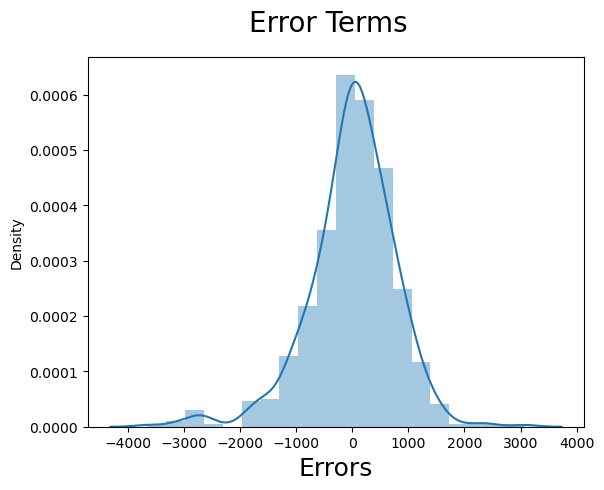

In [159]:
# Histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [160]:
VIFFunction(X_train_new)

,Features,VIF
2,workingday,43.26
9,sun,10.77
8,sat,10.39
3,atemp,2.78
1,holiday,2.77
12,spring,2.74
4,hum,1.92
13,winter,1.73
11,Misty,1.60
6,jan,1.49


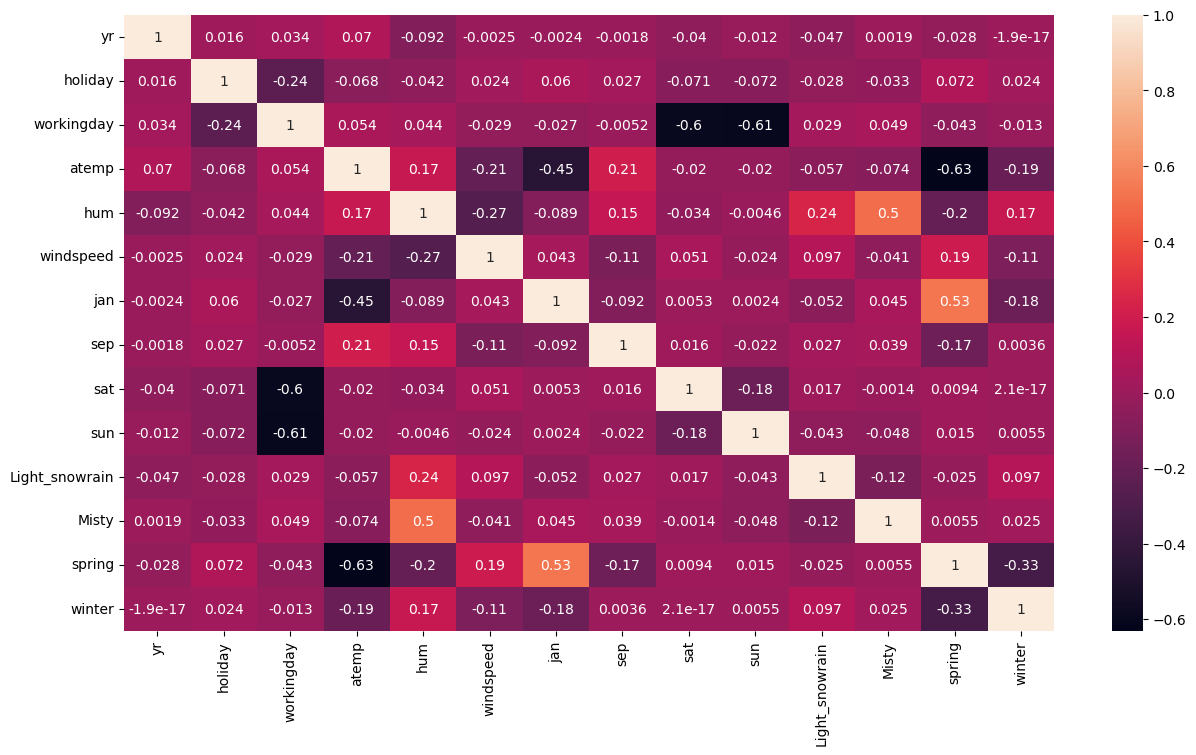

In [162]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

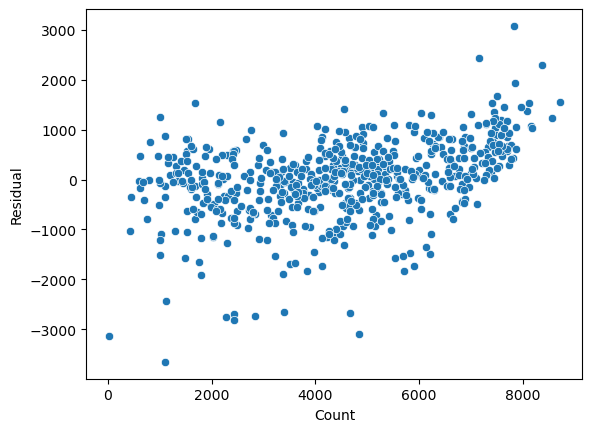

In [168]:
y_train_pred = lr_2.predict(X_train_lm_2)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

# Testing model

In [170]:
# Applying scaling on the test dataset

df_test[num_vars] = scaler.transform(df_test[cont_cols])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,aug,...,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter,humidity
184,0,1,0,0.831783,0.769660,63.7917,0.084219,0.100000,4,0,...,0,0,0,0,0,1,0,0,0,0.657364
535,1,0,1,0.901354,0.842587,59.2083,0.153728,0.633333,20,0,...,0,0,0,1,0,0,0,1,0,0.610133
299,0,0,1,0.511964,0.496145,81.2917,0.334206,0.866667,27,0,...,0,1,0,0,0,1,0,0,1,0.837699
221,0,0,1,0.881625,0.795343,42.4167,0.339570,0.300000,10,1,...,0,0,0,1,0,0,0,0,0,0.437098
152,0,0,1,0.817246,0.741471,30.5000,0.537414,0.033333,2,0,...,0,1,0,0,0,0,0,1,0,0.314298


In [171]:

y_test = df_test.pop('cnt')
X_test = df_test

In [174]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_2 = sm.add_constant(X_test)

y_pred = lr_2.predict(X_test_lm_2)

r2 = r2_score(y_test, y_pred)
r2

-68197754711.69681

In [180]:
lr_2.params

const             2218.118854
yr                2001.470362
holiday            -63.132727
workingday         888.590312
atemp             3888.264343
hum              -1175.883573
windspeed        -1330.200126
jan               -334.557323
sep                593.301041
sat                956.689336
sun                435.971933
Light_snowrain   -2250.730113
Misty             -482.919377
spring            -995.524097
winter             433.583177
dtype: float64

In [ ]:
Demand 